# Isolation Forest Classifier

<span>The isolation forest algorithm is similar to a random forest algorithm but is modified to detect the anomalies within the data. The algorithm generates an ensemble of decisions tree that each train on one feature from the training data and are randomly split on a value between the max and min value of that feature. Deep in the tree, random splitting continues. The go of an individual tree is to isolate each value in the data into a node. Once the tree has been fitted we can notice that anomalies are normally segmented into their noted very early on in the splitting process. What the model measures are the number of splits it took to push the anomalies down to its end node. For anomalies, it is common for its value to be segmented early on. Since isolation forest conduct this random over an ensemble of trees its common that on average anomalies with have the shorter path from the center. Therefore isolation forest uses a contamination rate to label points within the shorter pats anomalies.</span>

using the Isolation Forest algorithm, which is based on random forests and hence more adapted to large-dimensional settings, even if it performs quite well in the examples below.

I found a really good explanation of the algorithm via Google Images that leat me to a General Electric. Feel free to check it out using the link below.

<br><br>

![img](http://pubs.rsc.org/-/Image/Get?imageInfo.ImageType=GA&imageInfo.ImageIdentifier.ManuscriptID=C6AY01574C)

<br><br>**GE Report**: https://www.google.ca/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwja-t354KXdAhURHjQIHZsyCpwQ5TV6BAgBEAs&url=https%3A%2F%2Fwww.predix.io%2Fapi%2Fcatalog%2Fanalytics%2Fartifacts%2F53ab5bc9-3c7a-4b64-ace2-14d5bb898a78%2Ffile%3FfileName%3DIsolationForestOutlier%2520Documentation.pdf&psig=AOvVaw2hMBzLoPnsvlzJnl5BjVMp&ust=1536301965583892



### Import Preliminaries

In [1]:
# Import Modulse 
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import plottting functions
from matplotlib import rcParams, gridspec

# Import preprocessing functions
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix

# Import sklearn models
from sklearn.ensemble import IsolationForest

# Plotting Configuration
rcParams['figure.figsize'] = (30.0, 10.0)
rcParams.update({'font.size': 20})
colors = ['#74a9cf', '#6a51a3']

# Array transformation function
def anon_to_target(array):
    '''
    Converts Prediction in the +1/-1 format to 0/1 format for every value in the array

    Parameter
    ---------
    array: numpy array containing only +1/1

    Exmaples
    ---------
    >>>> anon_to_targets([1,1,,1,1,-1,1,-1,1])
    '''

    array = [0 if i == 1 else 1 for i in array]
    array = np.array(array).reshape(1, -1)[0]

    return array

# Plot a confusion matrix function
def plot_confusion_matrix(cm, classes, fontsize=20,
                          normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    THE MAIN CONFUSION MATRIX, KAVI DON'T DELTETE BY ACCIDENT AGAIN. Function plots a 
    confusion matrix given a cm matrix and class names

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ---------
    >>>>

    plot_confusion_matrix(
    cm,
    classes,
    fontsize=25,
    normalize=True,
    title=model.name.capitalize() + ': Test Set',
    cmap=plt.cm.Greens)

    '''
    cm_num = cm
    cm_per = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        None
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title.replace('_',' ').title()+'\n', size=fontsize)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=fontsize)
    plt.yticks(tick_marks, classes, size=fontsize)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Set color parameters
        color = "white" if cm[i, j] > thresh else "black"
        alignment = "center"

        # Plot perentage
        text = format(cm_per[i, j], '.5f')
        text = text + '%'
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='baseline',
            horizontalalignment='center',
            color=color)
        # Plot numeric
        text = format(cm_num[i, j], 'd')
        text = '\n \n' + text
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='center',
            horizontalalignment='center',
            color=color)

    plt.tight_layout()
    plt.ylabel('True label'.title(), size=fontsize)
    plt.xlabel('Predicted label'.title(), size=fontsize)

    return None


# Plot a train and test confusion matrix together
def plot_confusion_anomoly(train_model, train_y, test_y, cmap=plt.cm.Purples):
    '''
    Function plots a confusion matrix given train and test 
    unsuperived models

    Parameters
    ----------
    train_model: sklearn/keras model object to be trained on training data
    test_moedl: sklearn/keras model object to be trained on test data

    Examples
    ----------
    >>>> plot_confusion_anomoly(xg_model, train_x, train_y)
    >>>> plot_confusion_anomoly(rf_model, train_x, train_y)
    '''
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Plot Train Confusion Matrix
    fig = gridspec.GridSpec(3,3)
    grid_length = list(range(1,3))
    tuple_grid = [(i,j) for i in grid_length for j in grid_length]

    plt.subplot2grid((3,3), (0,0))
    cm = confusion_matrix(train_y, anon_to_target(train_model.predict(train_x)))
    plot_confusion_matrix(cm, classes, fontsize=20, 
                          title=train_model.name,
                         normalize=True, cmap=cmap)
    
    plt.subplot2grid((3,3), (0,1))
    cm = confusion_matrix(test_y, anon_to_target(train_model.predict(test_x)))
    plot_confusion_matrix(cm, classes, fontsize=20,
                          title=train_model.name,
                         normalize=True, cmap=cmap);

    return None

### Import Data

In [2]:
# Import dataset
kdddf = pd.read_csv('Data/KDD/kddcup.data')

# Append dataframe to a list
dfs = [kdddf]

# Lower columns names in dataframes
for df in dfs:
    df.columns = df.columns.str.lower()
    if df.columns.contains('class') == True:
        df.columns = df.columns.str.replace('class', 'target')
        
# Change target column names
kdddf = kdddf.rename(columns={'normal.':'target'})

### Data Preprocessing

##### Encoding the Data

In [3]:
# Encode target value to 0 and 1 
kdddf.target = [0 if i == 'normal.' else 1 for i in kdddf.target]

# drop feature that contains not data
kdddf.drop(['0.13'], axis=1,inplace=True)

# Encode all object colunms to categorical codes
for col in kdddf.select_dtypes('object'): #
    kdddf[col] = kdddf[col].astype('category').cat.codes

##### Sub Sampling and Preprocessing the Data

In [4]:
# Define working directory
wdf = kdddf
working_file_name = 'kdd'.lower() #synthetics, kdd, credit_card
print(f'Dataset: {working_file_name}')

# define the classes for the confusion matrix
classes = list(np.unique(wdf['target'].values))

# Encode value to numpy
X = wdf.drop('target',axis=1).values
y = wdf['target'].values

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# Compute the sample weights of the dataset
weights = compute_sample_weight(class_weight='balanced', y=train_y)

# Compuete the number of PCA comentents we are goint to use
components = round(train_x.shape[1]/1.5)

# Saving a backup copy the original data
train_x_norm, train_y_norm = train_x.copy(), train_y.copy()
test_x_norm, test_y_norm = test_x.copy(), test_y.copy()

# Print preprocessing title
print('='*10,'Preprocessing','='*10,'\n')

if working_file_name != 'credit_card':
# Transform the data using PCA
    pca = PCA(n_components=components)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)
    print(f'PCA Components: {components}')
else:
    print('No PCA Used')

# Transform the data using a standard scaler
scaler = StandardScaler(copy=True)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
print(f'Standard Scaler: Yes')

# Print data shape title
print('\n'+'='*10,'Data Shape','='*10,'\n')

# Printing metrics around the shape of the datframe

print(f'\nDataFrame Shape of X: {len(X)}')
print(f'DataFrame Shape of y: {len(y)}')
print(f'DataFrame Shape of X: {len(train_x)}')
print(f'DataFrame Shape of y: {len(train_y)}')
print(f'DataFrame Shape of X: {len(test_x)}')
print(f'DataFrame Shape of y: {len(test_y)}')
print(f'Target Classes: {classes}')

Dataset: kdd
========== Preprocessing ========== 

PCA Components: 27
Standard Scaler: Yes

========== Data Shape ========== 


DataFrame Shape of X: 4898430
DataFrame Shape of y: 4898430
DataFrame Shape of X: 3673822
DataFrame Shape of y: 3673822
DataFrame Shape of X: 1224608
DataFrame Shape of y: 1224608
Target Classes: [0, 1]


In [5]:
# Find the true contamination rate of the data
contamination_rate = (wdf['target'].value_counts()/wdf['target'].count())[1]
contamination_rate

0.8014098394791801

### Plot Isolation Forest Results

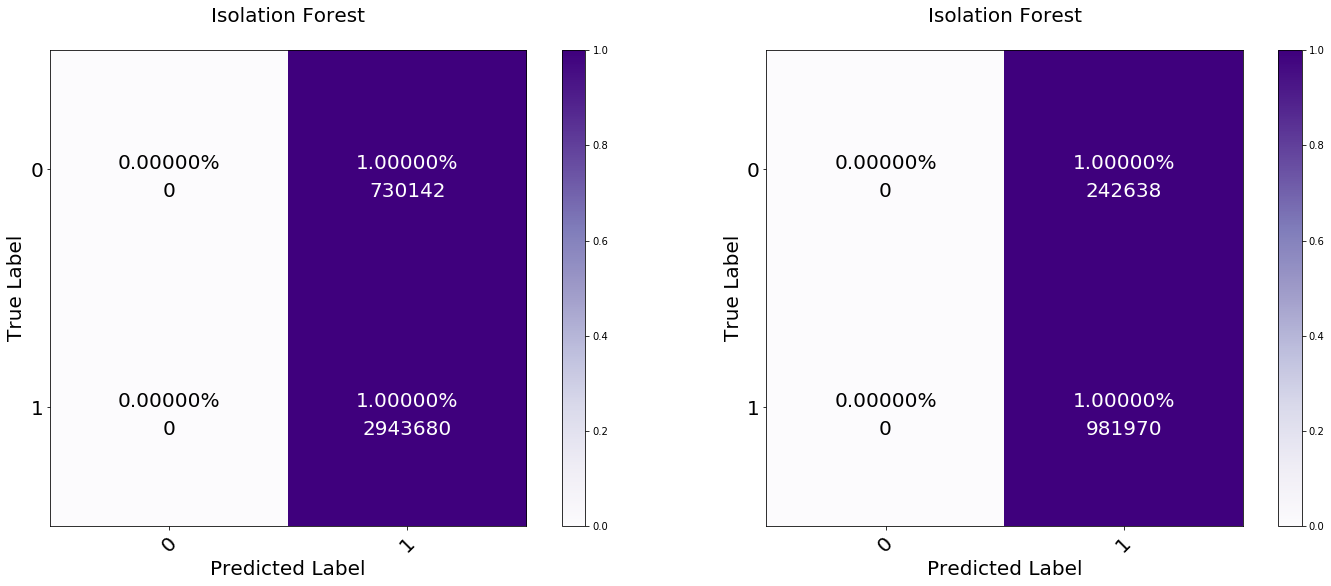

In [6]:
# Train our isolation forest model
if_model = IsolationForest(contamination=contamination_rate)
if_model.name = 'isolation_forest'
if_model.fit(train_x, sample_weight = weights)

plot_confusion_anomoly(if_model, train_y, test_y)

Author: Kavi Sekhon